In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('falldetection.csv')

df.describe()
len_df = len(df)
df.dropna(inplace=True)
len_after_df = len(df)

if len_df == len_after_df:
    print("Non sono stasti trovati dati nulli")
else:
    print("Sono stati trovati " + str(len_df - len_after_df) + " nulli")


Non ci sono dati nulli


In [2]:
#scalare i dati su dati reali. massimo HR registrato 208: applico funzione MinMixScaler con un range da 33 a 208

from sklearn.preprocessing import MinMaxScaler

hr_data = df['HR'].astype(float).to_numpy().reshape(-1, 1)
min_max_scaler = MinMaxScaler(copy=True, feature_range=(33, 208))
hr_data_minmax = min_max_scaler.fit_transform(hr_data)
print(hr_data_minmax)

df['HR'] = hr_data_minmax

df.describe()

[[41.44700944]
 [36.85624344]
 [39.24344176]
 ...
 [55.58656873]
 [55.58656873]
 [62.93179433]]


,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,65.784862,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,23.862714,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,48.792235,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,59.993704,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,76.704092,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,208.000000,52210.000000


In [3]:
fd = df.replace({'ACTIVITY':{0:'Standing', 1:'Walking', 2:'Sitting', 3:'Falling', 4:'Cramps', 5:'Running'}})
fd.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,Falling,4722.92,4019.64,-1600.00,13,41.447009,317
1,Sitting,4059.12,2191.03,-1146.08,20,36.856243,165
2,Sitting,4773.56,2787.99,-1263.38,46,39.243442,224
3,Cramps,8271.27,9545.98,-2848.93,26,52.281217,554
4,Cramps,7102.16,14148.80,-2381.15,85,48.975866,809


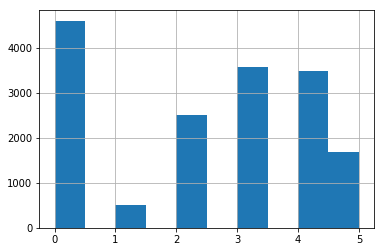

In [4]:
df['ACTIVITY'].hist()

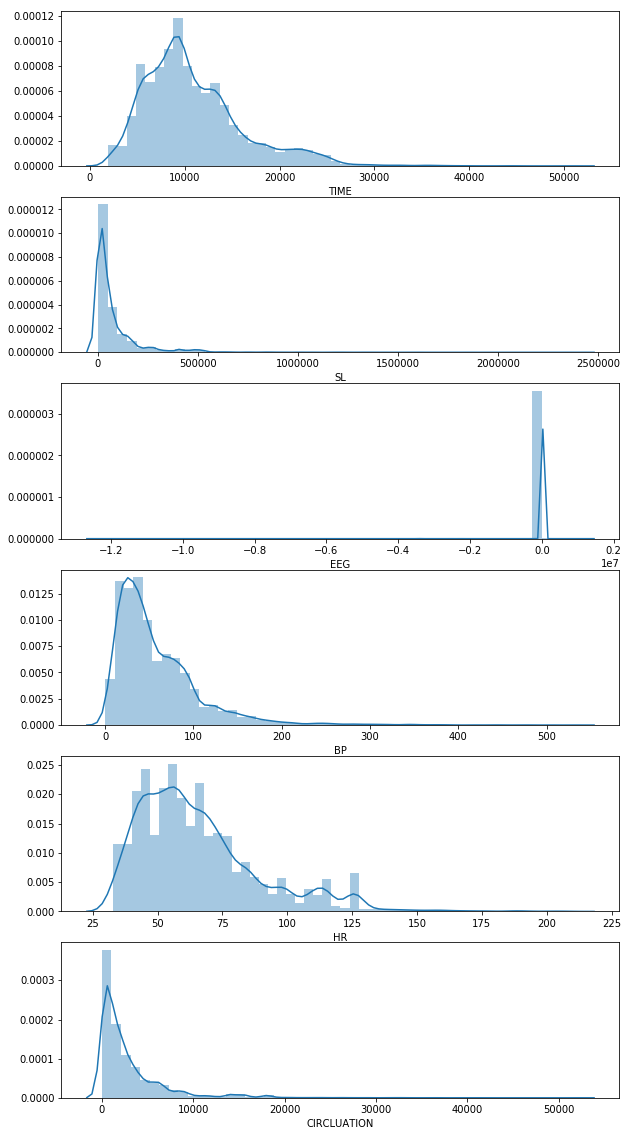

In [5]:
cols=['TIME','SL','EEG','BP','HR','CIRCLUATION']
#Distribution
fig = plt.figure(figsize=(10, 20)) # (Breite,Länge)
for i in range (0,len(cols)):
    fig.add_subplot(len(cols),1,i+1)
    sns.distplot(df[cols[i]]);

In [6]:
target = df['ACTIVITY']
data = df.drop(['ACTIVITY'], axis=1)
data.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,41.447009,317
1,4059.12,2191.03,-1146.08,20,36.856243,165
2,4773.56,2787.99,-1263.38,46,39.243442,224
3,8271.27,9545.98,-2848.93,26,52.281217,554
4,7102.16,14148.80,-2381.15,85,48.975866,809


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.05)

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [8]:
model = svm.SVC(kernel='rbf', gamma='scale', probability=True)
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)

print("SVM accuracy score: ", accuracy_score(y_test, model_predictions))

SVM accuracy score:  0.3902439024390244


In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_predictions = decision_tree.predict(x_test)

print("decision tree perecision: ", accuracy_score(y_test, decision_tree_predictions))

decision tree perecision:  0.6878048780487804


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

print("K neighbors perecision: ", accuracy_score(y_test, knn_predictions))


K neighbors perecision:  0.6268292682926829


In [11]:
from sklearn.naive_bayes import GaussianNB

native_bayes = GaussianNB()
native_bayes.fit(x_train, y_train)
native_bayes_predictions = native_bayes.predict(x_test)

print("native bayes perecision: ", accuracy_score(y_test, native_bayes_predictions))

native bayes perecision:  0.11829268292682926


In [12]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=2)
randomForest.fit(x_train, y_train)
randomForest_prediction = randomForest.predict(x_test)

print("RandomForest precision: ", accuracy_score(y_test, randomForest_prediction))


RandomForest precision:  0.7682926829268293


Feature ranking:
1. feature 1 (0.210545)
2. feature 2 (0.188268)
3. feature 4 (0.157362)
4. feature 5 (0.153852)
5. feature 3 (0.145390)
6. feature 0 (0.144583)


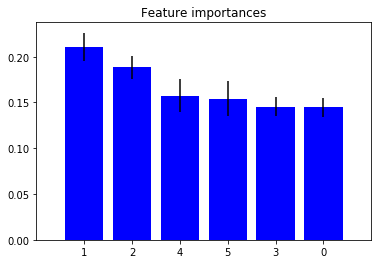

In [14]:
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],color="b", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()